### 코로나 데이터 분석

### 학습 목표
 * 코로나 데이터와 백신 접종률 데이터를 수집하여 지금까지 내용을 나라별로 분석해 본다.
 * 데이터 분석을 통해 pandas에 대해 좀 더 깊이 알아본다.

### 데이터가 수집된 사이트 
* bloomberg.com
  * https://www.bloomberg.com/graphics/covid-vaccine-tracker-global-distribution/
  
* 코로나 19(COVID-19) 실시간 상황판
  * https://coronaboard.kr/

In [1]:
from IPython.display import display, Image
import os, warnings
import re
warnings.filterwarnings(action='ignore')

### 01 파일 불러오기

In [3]:
os.listdir(os.getcwd()+"\\data")

['2021-08-07_corona.csv',
 '2021-08-07_corona.xlsx',
 '2021-09-19_corona.csv',
 '2021-09-19_corona.xlsx',
 '2021-09-20_corona.csv',
 '2021-09-20_corona.xlsx',
 '2021-09-28_corona.csv',
 '2021-09-28_corona.xlsx',
 '2021-09-29_corona.csv',
 '2021-09-29_corona.xlsx',
 '2021-11-28_corona.csv',
 '2021-11-28_corona.xlsx',
 '2021-11-29_01_datamerge.csv',
 '2021-11-29_01_datamerge.xlsx',
 '2021-11-29_01_vaccine_bloomberg.csv',
 '2021-11-29_01_vaccine_bloomberg.xlsx',
 '20210808_16datamerge.csv',
 '20210808_16datamerge.xlsx',
 '20210808_16_today_corona.csv',
 '20210808_16_today_corona.xlsx',
 '20210808_16_vaccine_bloomberg.csv',
 '20210808_16_vaccine_bloomberg.xlsx',
 '20210920_00_vaccine_bloomberg.csv',
 '20210920_00_vaccine_bloomberg.xlsx',
 '20210921_00_datamerge.csv',
 '20210921_00_datamerge.xlsx',
 '20210929_00_vaccine_bloomberg.csv',
 '20210929_00_vaccine_bloomberg.xlsx',
 '20210929_01_datamerge.csv',
 '20210929_01_datamerge.xlsx',
 '20210929_14_vaccine_bloomberg.csv',
 '20210929_14_vacci

In [4]:
import pandas as pd

corona = pd.read_csv("./data/2021-11-29_01_datamerge.csv")
corona.shape

(178, 24)

### Learn 01. 보이지 않는 전체 내용을 표시해 보기

In [5]:
print( pd.options.display.max_rows )    
print( pd.options.display.max_columns )

60
20


In [6]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500 

In [7]:
corona.head()

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구)
0,미국,U.S.,69.7,59.1,17.0,70.0,0.148270,11.3,1.6,79.2,148270,331002651,9416669.0,5573.0,12438.0,26778.0,49077695,26778.0,799312,174.0,38861714.0,21031.0,4.544477e+08,136.9
1,인도,India,57.1,31.5,108.0,112.0,0.025052,-999.0,1.4,98.3,25052,1380004385,105691.0,-1328.0,8944.0,8774.0,34572523,8774.0,468554,621.0,33998278.0,9481.0,1.222098e+09,89.4
2,브라질,Brazil,77.3,61.1,41.0,62.5,0.103862,5.8,2.8,96.4,103862,212559417,174346.0,3520.0,8318.0,9233.0,22076863,9233.0,614236,236.0,21288281.0,5477.0,2.979604e+08,141.8
3,영국,U.K.,76.2,69.3,16.0,37.0,0.148932,21.5,1.4,88.5,148932,67886011,1013851.0,27.0,925.0,39567.0,10110408,39567.0,144724,131.0,8951833.0,39409.0,1.143047e+08,171.1
4,러시아,Russia,44.9,37.8,75.0,98.5,0.065580,2.8,2.8,86.4,65580,145934462,1029507.0,1678.0,2300.0,33548.0,9570373,33548.0,272755,1224.0,8268111.0,30646.0,1.255448e+08,85.6


In [8]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   한글(국가명)    178 non-null    object 
 1   영문(블룸버그)   178 non-null    object 
 2   1차접종       178 non-null    float64
 3   2차접종       178 non-null    float64
 4   발생률순위      178 non-null    float64
 5   2차접종률순위    178 non-null    float64
 6   확진자비율(인구)  178 non-null    float64
 7   일별접종수      178 non-null    float64
 8   치명(%)      178 non-null    object 
 9   완치(%)      175 non-null    float64
 10  발생률        178 non-null    int64  
 11  인구수        178 non-null    int64  
 12  치료중합계      175 non-null    float64
 13  치료중1일      120 non-null    float64
 14  위중증합계      131 non-null    float64
 15  위중증1일      124 non-null    float64
 16  확진자합계      178 non-null    int64  
 17  확진자1일      124 non-null    float64
 18  사망자합계      178 non-null    int64  
 19  사망자1일      91 non-null     float64
 20  완치합계      

### 가설 : 백신 접종은 코로나 감염에 효과가 있다.

### 접종률(인구)와 발생률의 관계

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
import platform

### 한글 표시하기

In [10]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [11]:
corona.columns

Index(['한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '발생률순위', '2차접종률순위', '확진자비율(인구)',
       '일별접종수', '치명(%)', '완치(%)', '발생률', '인구수', '치료중합계', '치료중1일', '위중증합계',
       '위중증1일', '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '백신접종수',
       '백신보유율(인구)'],
      dtype='object')

<AxesSubplot:xlabel='발생률', ylabel='2차접종'>

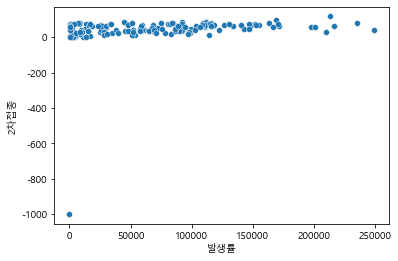

In [12]:
sns.scatterplot(x='발생률', y='2차접종', data=corona)

### 이상치 제거

In [13]:
corona = corona[corona['2차접종'] > 0]

<AxesSubplot:xlabel='발생률', ylabel='2차접종'>

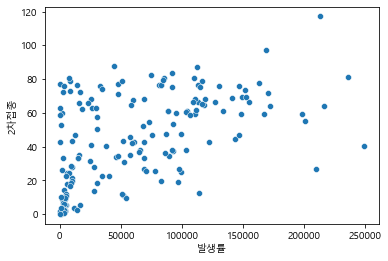

In [14]:
sns.scatterplot(x='발생률', y='2차접종', data=corona)

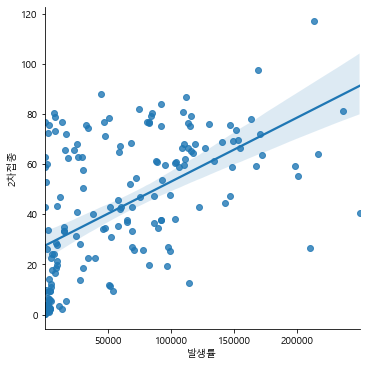

In [15]:
sns.lmplot(x='발생률', y='2차접종', data=corona)

In [16]:
corona[['발생률', '2차접종']].corr()

,발생률,2차접종
발생률,1.000000,0.544846
2차접종,0.544846,1.000000


### 확인 결과 나라별 백신 접종률과 인구당 확진자 비율은 0.582의 양의 상관관계를 갖는다.
 * 백신을 접종하면 할수록 인구당 확진자 비율은 양의 관계로 늘어난다.

### 백신 발생률과 사망률(인구당)은 어떠한가?

In [17]:
corona.head()

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구)
0,미국,U.S.,69.7,59.1,17.0,70.0,0.148270,11.3,1.6,79.2,148270,331002651,9416669.0,5573.0,12438.0,26778.0,49077695,26778.0,799312,174.0,38861714.0,21031.0,4.544477e+08,136.9
1,인도,India,57.1,31.5,108.0,112.0,0.025052,-999.0,1.4,98.3,25052,1380004385,105691.0,-1328.0,8944.0,8774.0,34572523,8774.0,468554,621.0,33998278.0,9481.0,1.222098e+09,89.4
2,브라질,Brazil,77.3,61.1,41.0,62.5,0.103862,5.8,2.8,96.4,103862,212559417,174346.0,3520.0,8318.0,9233.0,22076863,9233.0,614236,236.0,21288281.0,5477.0,2.979604e+08,141.8
3,영국,U.K.,76.2,69.3,16.0,37.0,0.148932,21.5,1.4,88.5,148932,67886011,1013851.0,27.0,925.0,39567.0,10110408,39567.0,144724,131.0,8951833.0,39409.0,1.143047e+08,171.1
4,러시아,Russia,44.9,37.8,75.0,98.5,0.065580,2.8,2.8,86.4,65580,145934462,1029507.0,1678.0,2300.0,33548.0,9570373,33548.0,272755,1224.0,8268111.0,30646.0,1.255448e+08,85.6


In [18]:
### 사망률 = 사망자수/인구수
corona['사망률'] = corona['사망자합계'] /  corona['인구수']
corona.head(15)

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),사망률
0,미국,U.S.,69.7,59.1,17.0,70.0,0.148270,11.3,1.6,79.2,148270,331002651,9416669.0,5573.0,12438.0,26778.0,49077695,26778.0,799312,174.0,38861714.0,21031.0,4.544477e+08,136.9,0.002415
1,인도,India,57.1,31.5,108.0,112.0,0.025052,-999.0,1.4,98.3,25052,1380004385,105691.0,-1328.0,8944.0,8774.0,34572523,8774.0,468554,621.0,33998278.0,9481.0,1.222098e+09,89.4,0.000340
2,브라질,Brazil,77.3,61.1,41.0,62.5,0.103862,5.8,2.8,96.4,103862,212559417,174346.0,3520.0,8318.0,9233.0,22076863,9233.0,614236,236.0,21288281.0,5477.0,2.979604e+08,141.8,0.002890
3,영국,U.K.,76.2,69.3,16.0,37.0,0.148932,21.5,1.4,88.5,148932,67886011,1013851.0,27.0,925.0,39567.0,10110408,39567.0,144724,131.0,8951833.0,39409.0,1.143047e+08,171.1,0.002132
4,러시아,Russia,44.9,37.8,75.0,98.5,0.065580,2.8,2.8,86.4,65580,145934462,1029507.0,1678.0,2300.0,33548.0,9570373,33548.0,272755,1224.0,8268111.0,30646.0,1.255448e+08,85.6,0.001869
5,터키,Turkey,67.6,60.5,42.0,64.0,0.103444,16.3,0.9,94.7,103444,84339067,389564.0,-1536.0,1405.0,23759.0,8724400,23759.0,76233,192.0,8258603.0,25103.0,1.200584e+08,144.4,0.000904
6,프랑스,France,80.0,79.1,28.0,12.0,0.116255,10.2,1.6,93.5,116255,65273511,370916.0,28671.0,1563.0,37218.0,7588400,37218.0,118871,34.0,7098613.0,8513.0,1.039945e+08,160.4,0.001821
7,이란,Iran,68.0,54.4,68.0,75.0,0.072731,0.9,2.1,96.0,72731,83992949,116005.0,-6481.0,3347.0,3781.0,6108882,3781.0,129629,80.0,5863248.0,10182.0,1.021452e+08,122.7,0.001543
8,독일,Germany,71.0,68.4,73.0,39.0,0.068688,9.6,1.8,83.8,68743,83783942,829899.0,19749.0,4202.0,40481.0,5754967,40481.0,101368,132.0,4823700.0,20600.0,1.211655e+08,145.8,0.001210
9,아르헨티나,Argentina,81.0,64.7,27.0,52.0,0.117833,3.5,2.2,97.4,117833,45195774,19536.0,160.0,593.0,1521.0,5325560,1521.0,116517,12.0,5189507.0,1349.0,6.710458e+07,149.3,0.002578


### 가설 : 백신은 중증과 사망자 감소에 효과가 있다.

### 2-1 백신 접종률과 사망률의 관계는 어떠한가?

In [19]:
corona[['사망률', '2차접종']].corr()

,사망률,2차접종
사망률,1.000000,0.316936
2차접종,0.316936,1.000000


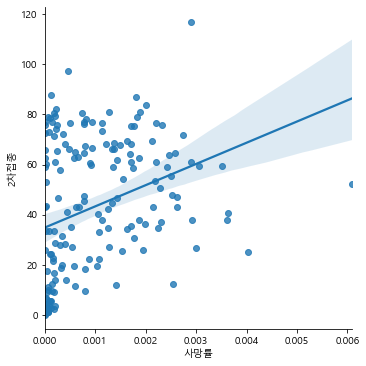

In [20]:
sns.lmplot(x='사망률', y='2차접종', data=corona)

### 백신 접종률과 사망률은 0.324의 양의 상관관계를 갖는다.
 * 데이터로 봤을 때, 이 부분에 대한 확인이 필요해 보인다.

### 2-2 백신 접종률과 중증 감소의 관계는 어떠한가?

In [21]:
corona.head(3)

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),사망률
0,미국,U.S.,69.7,59.1,17.0,70.0,0.148270,11.3,1.6,79.2,148270,331002651,9416669.0,5573.0,12438.0,26778.0,49077695,26778.0,799312,174.0,38861714.0,21031.0,4.544477e+08,136.9,0.002415
1,인도,India,57.1,31.5,108.0,112.0,0.025052,-999.0,1.4,98.3,25052,1380004385,105691.0,-1328.0,8944.0,8774.0,34572523,8774.0,468554,621.0,33998278.0,9481.0,1.222098e+09,89.4,0.000340
2,브라질,Brazil,77.3,61.1,41.0,62.5,0.103862,5.8,2.8,96.4,103862,212559417,174346.0,3520.0,8318.0,9233.0,22076863,9233.0,614236,236.0,21288281.0,5477.0,2.979604e+08,141.8,0.002890


### Learn02. Pandas 문자열 처리
 * [].str.strip() : 앞뒤 공백을 제거
 * [].str.lstrip() : 앞 공백을 제거
 * [].str.rstrip() : 뒤 공백을 제거
 * [].str.split('구분자', n=1, expand=True)  : 구분자를 기준으로 n개로 나눈다. expand=True(여러컬럼), False(하나의 컬럼)

In [22]:
### 사망률 = 사망자수/인구수
corona['위중증률'] = corona['위중증합계'] /  corona['인구수']
corona.head(15)

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),사망률,위중증률
0,미국,U.S.,69.7,59.1,17.0,70.0,0.148270,11.3,1.6,79.2,148270,331002651,9416669.0,5573.0,12438.0,26778.0,49077695,26778.0,799312,174.0,38861714.0,21031.0,4.544477e+08,136.9,0.002415,0.000038
1,인도,India,57.1,31.5,108.0,112.0,0.025052,-999.0,1.4,98.3,25052,1380004385,105691.0,-1328.0,8944.0,8774.0,34572523,8774.0,468554,621.0,33998278.0,9481.0,1.222098e+09,89.4,0.000340,0.000006
2,브라질,Brazil,77.3,61.1,41.0,62.5,0.103862,5.8,2.8,96.4,103862,212559417,174346.0,3520.0,8318.0,9233.0,22076863,9233.0,614236,236.0,21288281.0,5477.0,2.979604e+08,141.8,0.002890,0.000039
3,영국,U.K.,76.2,69.3,16.0,37.0,0.148932,21.5,1.4,88.5,148932,67886011,1013851.0,27.0,925.0,39567.0,10110408,39567.0,144724,131.0,8951833.0,39409.0,1.143047e+08,171.1,0.002132,0.000014
4,러시아,Russia,44.9,37.8,75.0,98.5,0.065580,2.8,2.8,86.4,65580,145934462,1029507.0,1678.0,2300.0,33548.0,9570373,33548.0,272755,1224.0,8268111.0,30646.0,1.255448e+08,85.6,0.001869,0.000016
5,터키,Turkey,67.6,60.5,42.0,64.0,0.103444,16.3,0.9,94.7,103444,84339067,389564.0,-1536.0,1405.0,23759.0,8724400,23759.0,76233,192.0,8258603.0,25103.0,1.200584e+08,144.4,0.000904,0.000017
6,프랑스,France,80.0,79.1,28.0,12.0,0.116255,10.2,1.6,93.5,116255,65273511,370916.0,28671.0,1563.0,37218.0,7588400,37218.0,118871,34.0,7098613.0,8513.0,1.039945e+08,160.4,0.001821,0.000024
7,이란,Iran,68.0,54.4,68.0,75.0,0.072731,0.9,2.1,96.0,72731,83992949,116005.0,-6481.0,3347.0,3781.0,6108882,3781.0,129629,80.0,5863248.0,10182.0,1.021452e+08,122.7,0.001543,0.000040
8,독일,Germany,71.0,68.4,73.0,39.0,0.068688,9.6,1.8,83.8,68743,83783942,829899.0,19749.0,4202.0,40481.0,5754967,40481.0,101368,132.0,4823700.0,20600.0,1.211655e+08,145.8,0.001210,0.000050
9,아르헨티나,Argentina,81.0,64.7,27.0,52.0,0.117833,3.5,2.2,97.4,117833,45195774,19536.0,160.0,593.0,1521.0,5325560,1521.0,116517,12.0,5189507.0,1349.0,6.710458e+07,149.3,0.002578,0.000013


### 에러 발생 
 * TypeError: unsupported operand type(s) for /: 'str' and 'int'

### Learn 03. 데이터 타입 변경하기

 * [].astype(dtype) :  모든 열의 데이터 타입을 변경
 * [].astype( {'컬럼명':dtype} ) : 특정 컬럼의 데이터 타입을 변경
   * str, int, float, category 등
   * int8, int16, int32, int64와 같이 변경 가능

In [23]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   한글(국가명)    177 non-null    object 
 1   영문(블룸버그)   177 non-null    object 
 2   1차접종       177 non-null    float64
 3   2차접종       177 non-null    float64
 4   발생률순위      177 non-null    float64
 5   2차접종률순위    177 non-null    float64
 6   확진자비율(인구)  177 non-null    float64
 7   일별접종수      177 non-null    float64
 8   치명(%)      177 non-null    object 
 9   완치(%)      174 non-null    float64
 10  발생률        177 non-null    int64  
 11  인구수        177 non-null    int64  
 12  치료중합계      174 non-null    float64
 13  치료중1일      120 non-null    float64
 14  위중증합계      131 non-null    float64
 15  위중증1일      124 non-null    float64
 16  확진자합계      177 non-null    int64  
 17  확진자1일      124 non-null    float64
 18  사망자합계      177 non-null    int64  
 19  사망자1일      91 non-null     float64
 20  완치합계      

In [24]:
corona['위중증합계'] = corona['위중증합계'].astype('int64')

ValueError: Cannot convert non-finite values (NA or inf) to integer

### 에러 발생 
 * ValueError: cannot convert float NaN to integer

In [25]:
corona['위중증합계'].unique()

array([1.2438e+04, 8.9440e+03, 8.3180e+03, 9.2500e+02, 2.3000e+03,
       1.4050e+03, 1.5630e+03, 3.3470e+03, 4.2020e+03, 5.9300e+02,
       5.9700e+02, 3.4200e+02, 6.2400e+02,        nan, 4.7980e+03,
       1.8160e+03, 1.7700e+02, 1.0230e+03, 5.1000e+02, 5.4600e+02,
       9.5400e+02, 9.4800e+02, 1.5950e+03, 1.0900e+02, 4.8000e+02,
       1.2120e+03, 6.7400e+02, 4.7000e+01, 6.6900e+02, 1.3840e+03,
       1.2800e+02, 9.4600e+02, 2.0900e+02, 6.0960e+03, 3.2000e+01,
       6.2000e+02, 1.0400e+02, 6.9500e+02, 1.7900e+02, 5.2800e+02,
       3.0000e+01, 3.4700e+02, 1.0370e+03, 6.4100e+02, 5.8000e+01,
       7.8300e+02, 5.4500e+02, 1.8600e+02, 5.0000e+00, 3.3000e+02,
       9.2000e+01, 1.1700e+02, 4.8000e+01, 2.2000e+02, 7.5900e+02,
       5.1000e+01, 2.0000e+01, 1.3100e+02, 4.2000e+01, 6.4700e+02,
       6.8100e+02, 1.9700e+02, 1.3000e+01, 1.9200e+02, 5.9000e+01,
       2.2600e+02, 2.0500e+02, 9.0000e+01, 7.0000e+00, 2.0000e+00,
       6.2000e+01, 1.7600e+02, 1.7000e+01, 3.8000e+01, 1.1000e

### Learn 04. 어떻게 NaN을 체크할 것인가?

In [26]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   한글(국가명)    177 non-null    object 
 1   영문(블룸버그)   177 non-null    object 
 2   1차접종       177 non-null    float64
 3   2차접종       177 non-null    float64
 4   발생률순위      177 non-null    float64
 5   2차접종률순위    177 non-null    float64
 6   확진자비율(인구)  177 non-null    float64
 7   일별접종수      177 non-null    float64
 8   치명(%)      177 non-null    object 
 9   완치(%)      174 non-null    float64
 10  발생률        177 non-null    int64  
 11  인구수        177 non-null    int64  
 12  치료중합계      174 non-null    float64
 13  치료중1일      120 non-null    float64
 14  위중증합계      131 non-null    float64
 15  위중증1일      124 non-null    float64
 16  확진자합계      177 non-null    int64  
 17  확진자1일      124 non-null    float64
 18  사망자합계      177 non-null    int64  
 19  사망자1일      91 non-null     float64
 20  완치합계      

### 위중증_수가 isnull()인 것을 살펴보기

In [27]:
corona[  corona['위중증합계'].isnull() ].head(10)

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),사망률,위중증률
13,인도네시아,Indonesia,51.5,34.9,114.0,104.0,0.015560,-999.0,3.4,96.4,15560,273523615,8214.0,-12.0,NaN,264.0,4255936,264.0,143808,1.0,4103914.0,275.0,232869970.0,87.2,0.000526,NaN
44,조지아,Georgia,30.7,26.6,5.0,119.0,0.210229,-999.0,1.4,92.9,210229,3989167,47202.0,-1775.0,NaN,3333.0,838639,3333.0,11927,56.0,779510.0,5052.0,2133935.0,57.3,0.002990,NaN
45,네팔,Nepal,32.4,28.1,103.0,115.0,0.028173,-999.0,1.4,97.7,28173,29136808,6966.0,-190.0,NaN,154.0,820878,154.0,11523,2.0,802389.0,342.0,17196376.0,60.4,0.000395,NaN
46,아랍에미레이트,UAE,91.2,82.2,67.0,6.0,0.075014,27.1,0.3,99.3,75014,9890402,2994.0,-20.0,NaN,60.0,741918,60.0,2146,1.0,736778.0,79.0,21817896.0,203.0,0.000217,NaN
51,벨라루스,Belarus,36.0,27.0,72.0,117.0,0.068983,-999.0,0.8,98.0,68983,9449323,7941.0,-533.0,NaN,1671.0,651839,1671.0,5054,13.0,638844.0,2191.0,5975709.0,63.1,0.000535,NaN
54,아제르바이잔,Azerbaijan,50.8,45.6,82.0,85.0,0.057774,8.1,1.3,94.2,57774,10139177,26252.0,-747.0,NaN,1662.0,585783,1662.0,7807,18.0,551724.0,2391.0,10426930.0,104.5,0.000770,NaN
56,스리랑카,Sri Lanka,73.0,63.0,105.0,55.0,0.026260,-999.0,2.5,94.2,26260,21413249,18343.0,283.0,NaN,732.0,562310,732.0,14305,27.0,529662.0,422.0,29650996.0,136.0,0.000668,NaN
61,미얀마,Myanmar,29.1,19.8,123.0,130.0,0.009579,-999.0,3.7,95.0,9579,54409800,6724.0,-167.0,NaN,505.0,521211,505.0,19079,12.0,495408.0,660.0,25869176.0,49.0,0.000351,NaN
69,쿠웨이트,Kuwait,30.6,19.4,47.0,132.0,0.096771,-999.0,0.6,99.3,96771,4270571,226.0,-8.0,NaN,21.0,413266,21.0,2465,NaN,410575.0,29.0,2668082.0,56.2,0.000577,NaN
73,리비아,Libya,25.3,9.6,83.0,145.0,0.054076,-999.0,1.5,92.0,54076,6871292,24410.0,-1944.0,NaN,784.0,371571,784.0,5438,8.0,341723.0,2720.0,2291638.0,34.8,0.000791,NaN


In [28]:
corona['위중증합계'].isnull().sum()

46

In [29]:
corona['위중증합계'].isna().sum()

46

### (의문) 왜 47개국은 위증증 통계가 없을까?

### 위증증_수2를 만들고, 위증증수가 없는 것은 -99999로 만들자.

In [30]:
corona['위중증합계2'] = corona['위중증합계'].copy()

In [31]:
corona.loc[ corona['위중증합계2'].isnull(), "위중증합계2"] = -99999
corona[  corona['위중증합계2'].isnull() ] 

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),사망률,위중증률,위중증합계2


In [32]:
corona['위중증합계2'] = corona['위중증합계2'].astype('int64')

In [33]:
### 사망률 = 사망자수/인구수
corona['위중증률'] = corona['위중증합계2'] /  corona['인구수']
corona.head(10)

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),사망률,위중증률,위중증합계2
0,미국,U.S.,69.7,59.1,17.0,70.0,0.148270,11.3,1.6,79.2,148270,331002651,9416669.0,5573.0,12438.0,26778.0,49077695,26778.0,799312,174.0,38861714.0,21031.0,4.544477e+08,136.9,0.002415,0.000038,12438
1,인도,India,57.1,31.5,108.0,112.0,0.025052,-999.0,1.4,98.3,25052,1380004385,105691.0,-1328.0,8944.0,8774.0,34572523,8774.0,468554,621.0,33998278.0,9481.0,1.222098e+09,89.4,0.000340,0.000006,8944
2,브라질,Brazil,77.3,61.1,41.0,62.5,0.103862,5.8,2.8,96.4,103862,212559417,174346.0,3520.0,8318.0,9233.0,22076863,9233.0,614236,236.0,21288281.0,5477.0,2.979604e+08,141.8,0.002890,0.000039,8318
3,영국,U.K.,76.2,69.3,16.0,37.0,0.148932,21.5,1.4,88.5,148932,67886011,1013851.0,27.0,925.0,39567.0,10110408,39567.0,144724,131.0,8951833.0,39409.0,1.143047e+08,171.1,0.002132,0.000014,925
4,러시아,Russia,44.9,37.8,75.0,98.5,0.065580,2.8,2.8,86.4,65580,145934462,1029507.0,1678.0,2300.0,33548.0,9570373,33548.0,272755,1224.0,8268111.0,30646.0,1.255448e+08,85.6,0.001869,0.000016,2300
5,터키,Turkey,67.6,60.5,42.0,64.0,0.103444,16.3,0.9,94.7,103444,84339067,389564.0,-1536.0,1405.0,23759.0,8724400,23759.0,76233,192.0,8258603.0,25103.0,1.200584e+08,144.4,0.000904,0.000017,1405
6,프랑스,France,80.0,79.1,28.0,12.0,0.116255,10.2,1.6,93.5,116255,65273511,370916.0,28671.0,1563.0,37218.0,7588400,37218.0,118871,34.0,7098613.0,8513.0,1.039945e+08,160.4,0.001821,0.000024,1563
7,이란,Iran,68.0,54.4,68.0,75.0,0.072731,0.9,2.1,96.0,72731,83992949,116005.0,-6481.0,3347.0,3781.0,6108882,3781.0,129629,80.0,5863248.0,10182.0,1.021452e+08,122.7,0.001543,0.000040,3347
8,독일,Germany,71.0,68.4,73.0,39.0,0.068688,9.6,1.8,83.8,68743,83783942,829899.0,19749.0,4202.0,40481.0,5754967,40481.0,101368,132.0,4823700.0,20600.0,1.211655e+08,145.8,0.001210,0.000050,4202
9,아르헨티나,Argentina,81.0,64.7,27.0,52.0,0.117833,3.5,2.2,97.4,117833,45195774,19536.0,160.0,593.0,1521.0,5325560,1521.0,116517,12.0,5189507.0,1349.0,6.710458e+07,149.3,0.002578,0.000013,593


In [34]:
corona.columns

Index(['한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '발생률순위', '2차접종률순위', '확진자비율(인구)',
       '일별접종수', '치명(%)', '완치(%)', '발생률', '인구수', '치료중합계', '치료중1일', '위중증합계',
       '위중증1일', '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '백신접종수',
       '백신보유율(인구)', '사망률', '위중증률', '위중증합계2'],
      dtype='object')

In [35]:
corona_sel = ['한글(국가명)', '발생률', '사망률', '위중증률', '인구수', '확진자비율(인구)',
              '1차접종', '2차접종', '확진자합계', '위중증합계', '치료중합계', '위중증합계2',
              '치료중1일', '위중증1일', '확진자1일', ]
corona_part = corona[corona_sel]
corona_part.head(10)

,한글(국가명),발생률,사망률,위중증률,인구수,확진자비율(인구),1차접종,2차접종,확진자합계,위중증합계,치료중합계,위중증합계2,치료중1일,위중증1일,확진자1일
0,미국,148270,0.002415,0.000038,331002651,0.148270,69.7,59.1,49077695,12438.0,9416669.0,12438,5573.0,26778.0,26778.0
1,인도,25052,0.000340,0.000006,1380004385,0.025052,57.1,31.5,34572523,8944.0,105691.0,8944,-1328.0,8774.0,8774.0
2,브라질,103862,0.002890,0.000039,212559417,0.103862,77.3,61.1,22076863,8318.0,174346.0,8318,3520.0,9233.0,9233.0
3,영국,148932,0.002132,0.000014,67886011,0.148932,76.2,69.3,10110408,925.0,1013851.0,925,27.0,39567.0,39567.0
4,러시아,65580,0.001869,0.000016,145934462,0.065580,44.9,37.8,9570373,2300.0,1029507.0,2300,1678.0,33548.0,33548.0
5,터키,103444,0.000904,0.000017,84339067,0.103444,67.6,60.5,8724400,1405.0,389564.0,1405,-1536.0,23759.0,23759.0
6,프랑스,116255,0.001821,0.000024,65273511,0.116255,80.0,79.1,7588400,1563.0,370916.0,1563,28671.0,37218.0,37218.0
7,이란,72731,0.001543,0.000040,83992949,0.072731,68.0,54.4,6108882,3347.0,116005.0,3347,-6481.0,3781.0,3781.0
8,독일,68743,0.001210,0.000050,83783942,0.068688,71.0,68.4,5754967,4202.0,829899.0,4202,19749.0,40481.0,40481.0
9,아르헨티나,117833,0.002578,0.000013,45195774,0.117833,81.0,64.7,5325560,593.0,19536.0,593,160.0,1521.0,1521.0


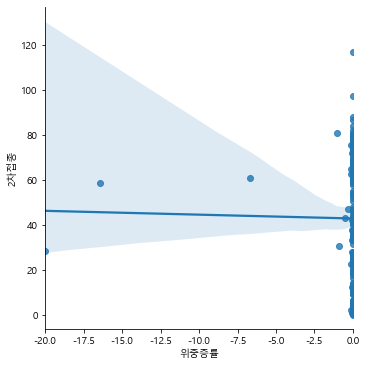

In [36]:
sns.lmplot(x='위중증률', y='2차접종', data=corona_part)

In [37]:
corona_part[['위중증률', '2차접종']].corr()

,위중증률,2차접종
위중증률,1.000000,-0.012305
2차접종,-0.012305,1.000000


### 결과 확인 : 인구당 접종률과 위중증률은 거의 관계가 없다.

### 오류가 없을까?
 * 오류: -99999 데이터가 있었기에 정확하지 않을 수 있다.

In [38]:
corona_part['위중증합계'].notnull().sum()

131

In [39]:
corona_part = corona_part[ corona_part['위중증합계'].notnull() ] 
corona_part['위중증합계'].isnull().sum()

0

In [40]:
corona_part[['위중증률', '2차접종']].corr()

,위중증률,2차접종
위중증률,1.00000,0.27649
2차접종,0.27649,1.00000


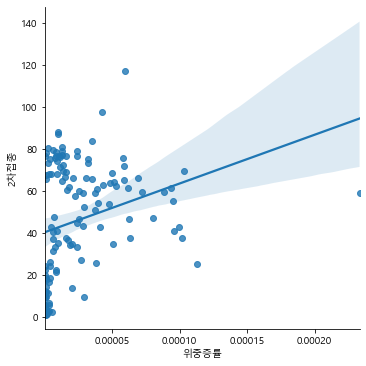

In [41]:
sns.lmplot(x='위중증률', y='2차접종', data=corona_part)

### 확인 : 데이터가 있는 131개국의 인구당 접종률과 위중증률은 0.2755로 양의 상관관계를 갖는다.

In [42]:
corona.head(10)

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),사망률,위중증률,위중증합계2
0,미국,U.S.,69.7,59.1,17.0,70.0,0.148270,11.3,1.6,79.2,148270,331002651,9416669.0,5573.0,12438.0,26778.0,49077695,26778.0,799312,174.0,38861714.0,21031.0,4.544477e+08,136.9,0.002415,0.000038,12438
1,인도,India,57.1,31.5,108.0,112.0,0.025052,-999.0,1.4,98.3,25052,1380004385,105691.0,-1328.0,8944.0,8774.0,34572523,8774.0,468554,621.0,33998278.0,9481.0,1.222098e+09,89.4,0.000340,0.000006,8944
2,브라질,Brazil,77.3,61.1,41.0,62.5,0.103862,5.8,2.8,96.4,103862,212559417,174346.0,3520.0,8318.0,9233.0,22076863,9233.0,614236,236.0,21288281.0,5477.0,2.979604e+08,141.8,0.002890,0.000039,8318
3,영국,U.K.,76.2,69.3,16.0,37.0,0.148932,21.5,1.4,88.5,148932,67886011,1013851.0,27.0,925.0,39567.0,10110408,39567.0,144724,131.0,8951833.0,39409.0,1.143047e+08,171.1,0.002132,0.000014,925
4,러시아,Russia,44.9,37.8,75.0,98.5,0.065580,2.8,2.8,86.4,65580,145934462,1029507.0,1678.0,2300.0,33548.0,9570373,33548.0,272755,1224.0,8268111.0,30646.0,1.255448e+08,85.6,0.001869,0.000016,2300
5,터키,Turkey,67.6,60.5,42.0,64.0,0.103444,16.3,0.9,94.7,103444,84339067,389564.0,-1536.0,1405.0,23759.0,8724400,23759.0,76233,192.0,8258603.0,25103.0,1.200584e+08,144.4,0.000904,0.000017,1405
6,프랑스,France,80.0,79.1,28.0,12.0,0.116255,10.2,1.6,93.5,116255,65273511,370916.0,28671.0,1563.0,37218.0,7588400,37218.0,118871,34.0,7098613.0,8513.0,1.039945e+08,160.4,0.001821,0.000024,1563
7,이란,Iran,68.0,54.4,68.0,75.0,0.072731,0.9,2.1,96.0,72731,83992949,116005.0,-6481.0,3347.0,3781.0,6108882,3781.0,129629,80.0,5863248.0,10182.0,1.021452e+08,122.7,0.001543,0.000040,3347
8,독일,Germany,71.0,68.4,73.0,39.0,0.068688,9.6,1.8,83.8,68743,83783942,829899.0,19749.0,4202.0,40481.0,5754967,40481.0,101368,132.0,4823700.0,20600.0,1.211655e+08,145.8,0.001210,0.000050,4202
9,아르헨티나,Argentina,81.0,64.7,27.0,52.0,0.117833,3.5,2.2,97.4,117833,45195774,19536.0,160.0,593.0,1521.0,5325560,1521.0,116517,12.0,5189507.0,1349.0,6.710458e+07,149.3,0.002578,0.000013,593


### 실습과제 : 인구 100만 이상의 국가에 대해서 다시 수행해 보자.
  * 접종률과 인구당 발생률 관계 확인
  * 접종률과 사망률과 중증률 관계 확인

### 의문 : 그렇다면 전체 국가가 아닌 30개의 국가의 데이터를 확인해 보면 어떨까?

## 02. 접종률이 높은 30개의 국가의 데이터를 확인해 보기

In [43]:
corona_top30 = corona[corona['2차접종률순위']<=30]
corona_top30.shape

(30, 27)

In [44]:
corona_top30

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),사망률,위중증률,위중증합계2
6,프랑스,France,80.0,79.1,28.0,12.0,0.116255,10.2,1.6,93.5,116255,65273511,370916.0,28671.0,1563.0,37218.0,7588400,37218.0,118871,34.0,7098613.0,8513.0,1.039945e+08,160.4,0.001821,2.394539e-05,1563
10,스페인,Spain,82.4,80.8,38.0,8.0,0.109743,9.8,1.7,95.8,109743,46754778,128771.0,NaN,597.0,NaN,5131012,NaN,87955,NaN,4914286.0,NaN,7.602652e+07,163.5,0.001881,1.276875e-05,597
12,이탈리아,Italy,78.0,76.7,63.0,20.0,0.082612,9.2,2.7,93.7,82612,60461826,178946.0,6328.0,624.0,12869.0,4994891,12869.0,133627,90.0,4682318.0,6451.0,9.541257e+07,158.1,0.002210,1.032056e-05,624
18,말레이시아,Malaysia,78.8,76.8,64.0,18.5,0.080936,5.8,1.2,96.3,80936,32365999,67252.0,-295.0,510.0,5097.0,2619577,5097.0,30280,40.0,2522045.0,5352.0,5.318534e+07,163.2,0.000936,1.575728e-05,510
19,네덜란드,Netherlands,76.7,73.5,15.0,30.0,0.151713,-999.0,0.7,NaN,151713,17134872,NaN,NaN,546.0,22133.0,2599579,22133.0,19317,45.0,NaN,NaN,2.448788e+07,142.1,0.001127,3.186484e-05,546
24,캐나다,Canada,79.9,76.9,91.0,16.5,0.047277,-999.0,1.7,96.9,47277,37742154,26396.0,1369.0,480.0,2183.0,1784354,2183.0,29628,10.0,1728330.0,804.0,6.035198e+07,160.8,0.000785,1.271788e-05,480
26,칠레,Chile,88.0,83.9,52.0,5.0,0.091916,42.6,2.2,93.9,92037,19116201,68623.0,NaN,674.0,NaN,1757077,NaN,38282,NaN,1650172.0,NaN,4.042168e+07,211.6,0.002003,3.525805e-05,674
27,일본,Japan,79.0,76.8,118.0,18.5,0.013659,-999.0,1.1,98.9,13659,126476461,725.0,-61.0,47.0,72.0,1727504,72.0,18370,NaN,1708409.0,133.0,1.965764e+08,155.8,0.000145,3.716107e-07,47
28,벨기에,Belgium,77.0,75.7,19.0,25.0,0.146824,11.9,1.6,76.8,146824,11589623,367639.0,NaN,669.0,NaN,1701633,NaN,26840,NaN,1307154.0,NaN,1.844799e+07,161.0,0.002316,5.772405e-05,669
36,포르투갈,Portugal,88.3,86.9,34.0,4.0,0.111782,-999.0,1.6,93.9,112066,10196709,51689.0,809.0,104.0,3364.0,1139810,3364.0,18405,12.0,1069716.0,2543.0,1.633951e+07,159.0,0.001805,1.019937e-05,104


### Learn 05. 데이터의 인덱스를 다시 재설정하기

* [].reset_index(inplace=True)

In [45]:
corona_top30.reset_index(inplace=True)
corona_top30

,index,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),사망률,위중증률,위중증합계2
0,6,프랑스,France,80.0,79.1,28.0,12.0,0.116255,10.2,1.6,93.5,116255,65273511,370916.0,28671.0,1563.0,37218.0,7588400,37218.0,118871,34.0,7098613.0,8513.0,1.039945e+08,160.4,0.001821,2.394539e-05,1563
1,10,스페인,Spain,82.4,80.8,38.0,8.0,0.109743,9.8,1.7,95.8,109743,46754778,128771.0,NaN,597.0,NaN,5131012,NaN,87955,NaN,4914286.0,NaN,7.602652e+07,163.5,0.001881,1.276875e-05,597
2,12,이탈리아,Italy,78.0,76.7,63.0,20.0,0.082612,9.2,2.7,93.7,82612,60461826,178946.0,6328.0,624.0,12869.0,4994891,12869.0,133627,90.0,4682318.0,6451.0,9.541257e+07,158.1,0.002210,1.032056e-05,624
3,18,말레이시아,Malaysia,78.8,76.8,64.0,18.5,0.080936,5.8,1.2,96.3,80936,32365999,67252.0,-295.0,510.0,5097.0,2619577,5097.0,30280,40.0,2522045.0,5352.0,5.318534e+07,163.2,0.000936,1.575728e-05,510
4,19,네덜란드,Netherlands,76.7,73.5,15.0,30.0,0.151713,-999.0,0.7,NaN,151713,17134872,NaN,NaN,546.0,22133.0,2599579,22133.0,19317,45.0,NaN,NaN,2.448788e+07,142.1,0.001127,3.186484e-05,546
5,24,캐나다,Canada,79.9,76.9,91.0,16.5,0.047277,-999.0,1.7,96.9,47277,37742154,26396.0,1369.0,480.0,2183.0,1784354,2183.0,29628,10.0,1728330.0,804.0,6.035198e+07,160.8,0.000785,1.271788e-05,480
6,26,칠레,Chile,88.0,83.9,52.0,5.0,0.091916,42.6,2.2,93.9,92037,19116201,68623.0,NaN,674.0,NaN,1757077,NaN,38282,NaN,1650172.0,NaN,4.042168e+07,211.6,0.002003,3.525805e-05,674
7,27,일본,Japan,79.0,76.8,118.0,18.5,0.013659,-999.0,1.1,98.9,13659,126476461,725.0,-61.0,47.0,72.0,1727504,72.0,18370,NaN,1708409.0,133.0,1.965764e+08,155.8,0.000145,3.716107e-07,47
8,28,벨기에,Belgium,77.0,75.7,19.0,25.0,0.146824,11.9,1.6,76.8,146824,11589623,367639.0,NaN,669.0,NaN,1701633,NaN,26840,NaN,1307154.0,NaN,1.844799e+07,161.0,0.002316,5.772405e-05,669
9,36,포르투갈,Portugal,88.3,86.9,34.0,4.0,0.111782,-999.0,1.6,93.9,112066,10196709,51689.0,809.0,104.0,3364.0,1139810,3364.0,18405,12.0,1069716.0,2543.0,1.633951e+07,159.0,0.001805,1.019937e-05,104


### Learn 06. 데이터를 정렬시키기 2가지
 * sort_index() : 인덱스를 기준으로 정렬
 * sort_values(by=[], ascending=False, axis=0,1, inplace=True or False) : 컬럼의 값을 기준으로 데이터 정렬
   * by : 정렬할 열 선택
   * axis : 0 : index, 1: columns

In [46]:
corona_top30.columns

Index(['index', '한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '발생률순위', '2차접종률순위',
       '확진자비율(인구)', '일별접종수', '치명(%)', '완치(%)', '발생률', '인구수', '치료중합계', '치료중1일',
       '위중증합계', '위중증1일', '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일',
       '백신접종수', '백신보유율(인구)', '사망률', '위중증률', '위중증합계2'],
      dtype='object')

In [47]:
corona_sel = ['한글(국가명)', '1차접종', '2차접종', '발생률순위', '2차접종률순위', '확진자비율(인구)',
              '발생률', '인구수', '치료중합계', '위중증합계', '확진자합계', '사망자합계', 
              '사망률', '위중증률']
corona_top30_part = corona_top30[corona_sel]
corona_top30_part

,한글(국가명),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),발생률,인구수,치료중합계,위중증합계,확진자합계,사망자합계,사망률,위중증률
0,프랑스,80.0,79.1,28.0,12.0,0.116255,116255,65273511,370916.0,1563.0,7588400,118871,0.001821,2.394539e-05
1,스페인,82.4,80.8,38.0,8.0,0.109743,109743,46754778,128771.0,597.0,5131012,87955,0.001881,1.276875e-05
2,이탈리아,78.0,76.7,63.0,20.0,0.082612,82612,60461826,178946.0,624.0,4994891,133627,0.002210,1.032056e-05
3,말레이시아,78.8,76.8,64.0,18.5,0.080936,80936,32365999,67252.0,510.0,2619577,30280,0.000936,1.575728e-05
4,네덜란드,76.7,73.5,15.0,30.0,0.151713,151713,17134872,NaN,546.0,2599579,19317,0.001127,3.186484e-05
5,캐나다,79.9,76.9,91.0,16.5,0.047277,47277,37742154,26396.0,480.0,1784354,29628,0.000785,1.271788e-05
6,칠레,88.0,83.9,52.0,5.0,0.091916,92037,19116201,68623.0,674.0,1757077,38282,0.002003,3.525805e-05
7,일본,79.0,76.8,118.0,18.5,0.013659,13659,126476461,725.0,47.0,1727504,18370,0.000145,3.716107e-07
8,벨기에,77.0,75.7,19.0,25.0,0.146824,146824,11589623,367639.0,669.0,1701633,26840,0.002316,5.772405e-05
9,포르투갈,88.3,86.9,34.0,4.0,0.111782,112066,10196709,51689.0,104.0,1139810,18405,0.001805,1.019937e-05


In [48]:
# 접종률_순위 을 기준으로 정렬, 내림차순
corona_top30_part_sorted = corona_top30_part.sort_values(by=['2차접종률순위'], ascending=True)

In [49]:
corona_top30_part_sorted

,한글(국가명),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),발생률,인구수,치료중합계,위중증합계,확진자합계,사망자합계,사망률,위중증률
27,지브롤터,120.3,117.1,4.0,1.0,0.213084,213084,33691,449.0,2.0,7179,98,0.002909,5.936303e-05
22,몰디브,106.3,97.5,10.0,2.0,0.168996,168996,540544,1807.0,23.0,91350,248,0.000459,4.254973e-05
17,싱가포르,88.9,87.9,93.0,3.0,0.044721,44721,5850342,14684.0,58.0,261636,690,0.000118,9.913950e-06
9,포르투갈,88.3,86.9,34.0,4.0,0.111782,112066,10196709,51689.0,104.0,1139810,18405,0.001805,1.019937e-05
6,칠레,88.0,83.9,52.0,5.0,0.091916,92037,19116201,68623.0,674.0,1757077,38282,0.002003,3.525805e-05
11,아랍에미레이트,91.2,82.2,67.0,6.0,0.075014,75014,9890402,2994.0,NaN,741918,2146,0.000217,-1.011071e-02
23,세이셸,85.3,81.1,2.0,7.0,0.235869,235869,98347,482.0,NaN,23197,125,0.001271,-1.016798e+00
1,스페인,82.4,80.8,38.0,8.0,0.109743,109743,46754778,128771.0,597.0,5131012,87955,0.001881,1.276875e-05
20,캄보디아,85.6,80.5,131.0,9.0,0.007183,7183,16718965,690.0,NaN,120087,2931,0.000175,-5.981172e-03
10,쿠바,89.5,80.4,59.0,10.0,0.084939,84952,11326616,1028.0,30.0,962067,8300,0.000733,2.648629e-06


In [50]:
corona_top30_part_sorted.reset_index(inplace=True)

In [51]:
corona_top30_part_sorted

,index,한글(국가명),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),발생률,인구수,치료중합계,위중증합계,확진자합계,사망자합계,사망률,위중증률
0,27,지브롤터,120.3,117.1,4.0,1.0,0.213084,213084,33691,449.0,2.0,7179,98,0.002909,5.936303e-05
1,22,몰디브,106.3,97.5,10.0,2.0,0.168996,168996,540544,1807.0,23.0,91350,248,0.000459,4.254973e-05
2,17,싱가포르,88.9,87.9,93.0,3.0,0.044721,44721,5850342,14684.0,58.0,261636,690,0.000118,9.913950e-06
3,9,포르투갈,88.3,86.9,34.0,4.0,0.111782,112066,10196709,51689.0,104.0,1139810,18405,0.001805,1.019937e-05
4,6,칠레,88.0,83.9,52.0,5.0,0.091916,92037,19116201,68623.0,674.0,1757077,38282,0.002003,3.525805e-05
5,11,아랍에미레이트,91.2,82.2,67.0,6.0,0.075014,75014,9890402,2994.0,NaN,741918,2146,0.000217,-1.011071e-02
6,23,세이셸,85.3,81.1,2.0,7.0,0.235869,235869,98347,482.0,NaN,23197,125,0.001271,-1.016798e+00
7,1,스페인,82.4,80.8,38.0,8.0,0.109743,109743,46754778,128771.0,597.0,5131012,87955,0.001881,1.276875e-05
8,20,캄보디아,85.6,80.5,131.0,9.0,0.007183,7183,16718965,690.0,NaN,120087,2931,0.000175,-5.981172e-03
9,10,쿠바,89.5,80.4,59.0,10.0,0.084939,84952,11326616,1028.0,30.0,962067,8300,0.000733,2.648629e-06


### 상관관계 확인하기

In [52]:
corona_top30_part_sorted[['2차접종', '확진자비율(인구)']].corr()

,2차접종,확진자비율(인구)
2차접종,1.000000,0.436436
확진자비율(인구),0.436436,1.000000


In [53]:
corona_top30_part_sorted[['2차접종', '사망률']].corr()

,2차접종,사망률
2차접종,1.000000,0.337679
사망률,0.337679,1.000000


In [54]:
corona_top30_part_sorted[['2차접종', '위중증률']].corr()

,2차접종,위중증률
2차접종,1.000000,-0.003366
위중증률,-0.003366,1.000000


### 접종률 상위 30개국의 데이터 확인 결과 큰 연관관계가 보이지 않는다.

### 실습 : 위증증 데이터는 처리가 안되었다. 이를 처리해 보자.

### 03. 200만 이상의 국가에 대해서 확인

In [55]:
corona_200m = corona[corona['인구수']>=2000000]
corona_200m.shape

(136, 27)

In [56]:
corona_200m.reset_index(inplace=True)
corona_200m.head(10)

,index,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),사망률,위중증률,위중증합계2
0,0,미국,U.S.,69.7,59.1,17.0,70.0,0.148270,11.3,1.6,79.2,148270,331002651,9416669.0,5573.0,12438.0,26778.0,49077695,26778.0,799312,174.0,38861714.0,21031.0,4.544477e+08,136.9,0.002415,0.000038,12438
1,1,인도,India,57.1,31.5,108.0,112.0,0.025052,-999.0,1.4,98.3,25052,1380004385,105691.0,-1328.0,8944.0,8774.0,34572523,8774.0,468554,621.0,33998278.0,9481.0,1.222098e+09,89.4,0.000340,0.000006,8944
2,2,브라질,Brazil,77.3,61.1,41.0,62.5,0.103862,5.8,2.8,96.4,103862,212559417,174346.0,3520.0,8318.0,9233.0,22076863,9233.0,614236,236.0,21288281.0,5477.0,2.979604e+08,141.8,0.002890,0.000039,8318
3,3,영국,U.K.,76.2,69.3,16.0,37.0,0.148932,21.5,1.4,88.5,148932,67886011,1013851.0,27.0,925.0,39567.0,10110408,39567.0,144724,131.0,8951833.0,39409.0,1.143047e+08,171.1,0.002132,0.000014,925
4,4,러시아,Russia,44.9,37.8,75.0,98.5,0.065580,2.8,2.8,86.4,65580,145934462,1029507.0,1678.0,2300.0,33548.0,9570373,33548.0,272755,1224.0,8268111.0,30646.0,1.255448e+08,85.6,0.001869,0.000016,2300
5,5,터키,Turkey,67.6,60.5,42.0,64.0,0.103444,16.3,0.9,94.7,103444,84339067,389564.0,-1536.0,1405.0,23759.0,8724400,23759.0,76233,192.0,8258603.0,25103.0,1.200584e+08,144.4,0.000904,0.000017,1405
6,6,프랑스,France,80.0,79.1,28.0,12.0,0.116255,10.2,1.6,93.5,116255,65273511,370916.0,28671.0,1563.0,37218.0,7588400,37218.0,118871,34.0,7098613.0,8513.0,1.039945e+08,160.4,0.001821,0.000024,1563
7,7,이란,Iran,68.0,54.4,68.0,75.0,0.072731,0.9,2.1,96.0,72731,83992949,116005.0,-6481.0,3347.0,3781.0,6108882,3781.0,129629,80.0,5863248.0,10182.0,1.021452e+08,122.7,0.001543,0.000040,3347
8,8,독일,Germany,71.0,68.4,73.0,39.0,0.068688,9.6,1.8,83.8,68743,83783942,829899.0,19749.0,4202.0,40481.0,5754967,40481.0,101368,132.0,4823700.0,20600.0,1.211655e+08,145.8,0.001210,0.000050,4202
9,9,아르헨티나,Argentina,81.0,64.7,27.0,52.0,0.117833,3.5,2.2,97.4,117833,45195774,19536.0,160.0,593.0,1521.0,5325560,1521.0,116517,12.0,5189507.0,1349.0,6.710458e+07,149.3,0.002578,0.000013,593


In [57]:
corona_200m.columns

Index(['index', '한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '발생률순위', '2차접종률순위',
       '확진자비율(인구)', '일별접종수', '치명(%)', '완치(%)', '발생률', '인구수', '치료중합계', '치료중1일',
       '위중증합계', '위중증1일', '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일',
       '백신접종수', '백신보유율(인구)', '사망률', '위중증률', '위중증합계2'],
      dtype='object')

In [58]:
corona_sel = ['한글(국가명)', '1차접종', '2차접종', '발생률순위', '2차접종률순위', '확진자비율(인구)',
              '발생률', '인구수', '치료중합계', '위중증합계', '확진자합계', '사망자합계', 
              '사망률', '위중증률']
corona_200m_part = corona_200m[corona_sel]
corona_200m_part.head(10)


,한글(국가명),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),발생률,인구수,치료중합계,위중증합계,확진자합계,사망자합계,사망률,위중증률
0,미국,69.7,59.1,17.0,70.0,0.148270,148270,331002651,9416669.0,12438.0,49077695,799312,0.002415,0.000038
1,인도,57.1,31.5,108.0,112.0,0.025052,25052,1380004385,105691.0,8944.0,34572523,468554,0.000340,0.000006
2,브라질,77.3,61.1,41.0,62.5,0.103862,103862,212559417,174346.0,8318.0,22076863,614236,0.002890,0.000039
3,영국,76.2,69.3,16.0,37.0,0.148932,148932,67886011,1013851.0,925.0,10110408,144724,0.002132,0.000014
4,러시아,44.9,37.8,75.0,98.5,0.065580,65580,145934462,1029507.0,2300.0,9570373,272755,0.001869,0.000016
5,터키,67.6,60.5,42.0,64.0,0.103444,103444,84339067,389564.0,1405.0,8724400,76233,0.000904,0.000017
6,프랑스,80.0,79.1,28.0,12.0,0.116255,116255,65273511,370916.0,1563.0,7588400,118871,0.001821,0.000024
7,이란,68.0,54.4,68.0,75.0,0.072731,72731,83992949,116005.0,3347.0,6108882,129629,0.001543,0.000040
8,독일,71.0,68.4,73.0,39.0,0.068688,68743,83783942,829899.0,4202.0,5754967,101368,0.001210,0.000050
9,아르헨티나,81.0,64.7,27.0,52.0,0.117833,117833,45195774,19536.0,593.0,5325560,116517,0.002578,0.000013


In [59]:
corona_200m_part_sorted = corona_200m_part.sort_values(by=['2차접종'], ascending=False)
corona_200m_part_sorted.head(10)


,한글(국가명),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),발생률,인구수,치료중합계,위중증합계,확진자합계,사망자합계,사망률,위중증률
79,싱가포르,88.9,87.9,93.0,3.0,0.044721,44721,5850342,14684.0,58.0,261636,690,0.000118,0.000010
36,포르투갈,88.3,86.9,34.0,4.0,0.111782,112066,10196709,51689.0,104.0,1139810,18405,0.001805,0.000010
26,칠레,88.0,83.9,52.0,5.0,0.091916,92037,19116201,68623.0,674.0,1757077,38282,0.002003,0.000035
46,아랍에미레이트,91.2,82.2,67.0,6.0,0.075014,75014,9890402,2994.0,NaN,741918,2146,0.000217,-0.010111
10,스페인,82.4,80.8,38.0,8.0,0.109743,109743,46754778,128771.0,597.0,5131012,87955,0.001881,0.000013
99,캄보디아,85.6,80.5,131.0,9.0,0.007183,7183,16718965,690.0,NaN,120087,2931,0.000175,-0.005981
40,쿠바,89.5,80.4,59.0,10.0,0.084939,84952,11326616,1028.0,30.0,962067,8300,0.000733,0.000003
82,카타르,84.4,79.4,60.0,11.0,0.084390,84390,2881053,1994.0,17.0,243132,611,0.000212,0.000006
6,프랑스,80.0,79.1,28.0,12.0,0.116255,116255,65273511,370916.0,1563.0,7588400,118871,0.001821,0.000024
66,대한민국,82.0,78.8,127.0,13.0,0.008600,8600,51269185,45037.0,647.0,440896,3548,0.000069,0.000013


### 상관관계 확인하기

In [60]:
corona_200m_part_sorted[['2차접종', '확진자비율(인구)']].corr()

,2차접종,확진자비율(인구)
2차접종,1.00000,0.53233
확진자비율(인구),0.53233,1.00000


In [61]:
corona_200m_part_sorted[['2차접종', '사망률']].corr()

,2차접종,사망률
2차접종,1.000000,0.356157
사망률,0.356157,1.000000


In [62]:
corona_200m_part_sorted[['2차접종', '위중증률']].corr()

,2차접종,위중증률
2차접종,1.000000,0.157611
위중증률,0.157611,1.000000


### 결과 확인
### 01. 인구 200만 이상의 국가의 백신 접종률과 인구당 확진자 비율은 양의 상관관계의 관계를 갖는다.
### 02. 인구 200만 이상의 국가의 백신 접종률과 사망률은 양의 상관관계의 관계를 갖는다.
### 03. 인구 200만 이상의 국가의 백신 접종률과 위중증률은 양의 상관관계의 관계를 갖는다.(관계가 크지 않음)
